In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#download Cifar-10 dataset
(x_train,y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
#print the size of the dataset

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])
#Convert the category label into onehot encoding 
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
9


9

In [4]:
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)

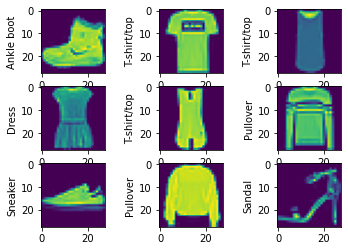

In [5]:
#Create a image tag list
category_dict = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',
 6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
  #create a figure with 9 subplots
  plt.subplot(3,3,i+1)
  #show an image
  plt.imshow(x_train[i])
  #show the label
  plt.ylabel(category_dict[y_train[i]])
plt.show()


In [6]:
#Pixel normalization
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255

In [7]:
def CNN_classification_model(input_size = x_train.shape[1:]):
    model = Sequential() 
    #the first block with 2 convolutional layers and 1 maxpooling layer
    '''Conv1 with 32 3*3 kernels 
    padding="same": it applies zero padding to the input image so that the input image gets fully covered by 
    the filter and specified stride.
    It is called SAME because, for stride 1 , the output will be the same as the input.
    output: 32*32*32'''
    model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_size)) 
    #relu activation function
    model.add(Activation('relu')) 
    #Conv2
    model.add(Conv2D(64, (3, 3))) 
    model.add(Activation('relu')) 
    #maxpooling 
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    #the second block
    model.add(Conv2D(64, (3, 3), padding='same')) 
    model.add(Activation('relu')) 
    model.add(Conv2D(64, (3, 3))) 
    model.add(Activation('relu')) 
    #maxpooling.the default strides =1
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    
    #Before sending a feature map into a fully connected network, it should be flattened into a column vector. 
    model.add(Flatten()) 
    model.add(Dropout(0.5))
    #fully connected layer
    model.add(Dense(128)) 
    model.add(Activation('relu')) 
    model.add(Dense(64)) 
    model.add(Activation('relu')) 
    #dropout layer.every neuronis set to 0 with a probability of 0.25
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    #map the score of each class into probability
    model.add(Activation('softmax')) 
    
    opt = keras.optimizers.Adamax(lr=0.001)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
    return model
#model=CNN_classification_model()
#model.summary()

In [8]:
model=CNN_classification_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 activation (Activation)     (None, 28, 28, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, eye='loss',verbose=1, save_best_only=True)
#load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
  model.load_weights(trained_weights_path, by_name =True)
  model.save('./model/final_cifar.h5')
#train
train_model=model.fit(x_train,y_train, batch_size=128, epochs=15,callbacks = [model_checkpoint],verbose=1,validation_split=0.10)


Epoch 1/15
422/422 [==============================] - ETA: 0s - loss: 0.8256 - accuracy: 0.6995
Epoch 1: val_loss improved from inf to 0.46190, saving model to final_cifar10.h5
422/422 [==============================] - 18s 27ms/step - loss: 0.8256 - accuracy: 0.6995 - val_loss: 0.4619 - val_accuracy: 0.8313
Epoch 2/15
421/422 [============================>.] - ETA: 0s - loss: 0.5017 - accuracy: 0.8183
Epoch 2: val_loss improved from 0.46190 to 0.37560, saving model to final_cifar10.h5
422/422 [==============================] - 9s 21ms/step - loss: 0.5018 - accuracy: 0.8181 - val_loss: 0.3756 - val_accuracy: 0.8575
Epoch 3/15
421/422 [============================>.] - ETA: 0s - loss: 0.4191 - accuracy: 0.8484
Epoch 3: val_loss improved from 0.37560 to 0.32516, saving model to final_cifar10.h5
422/422 [==============================] - 8s 19ms/step - loss: 0.4192 - accuracy: 0.8484 - val_loss: 0.3252 - val_accuracy: 0.8752
Epoch 4/15
421/422 [============================>.] - ETA: 0s - 

In [10]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)


313/313 [==============================] - 1s 4ms/step - loss: 0.2238 - accuracy: 0.9201


[0.22384601831436157, 0.9200999736785889]

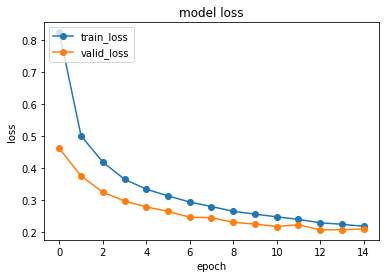

In [11]:
fig=plt.figure()
train_loss=train_model.history['loss']
valid_loss=train_model.history['val_loss']
train_accuracy=train_model.history['accuracy']
valid_accuracy=train_model.history['val_accuracy']
plt.plot(train_loss,'-o')
plt.plot(valid_loss,'-o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','valid_loss'],loc='upper left')
plt.show()
fig.savefig('fashion_mnist_train_val_Adamax.png',dpi=100)
plt.close()

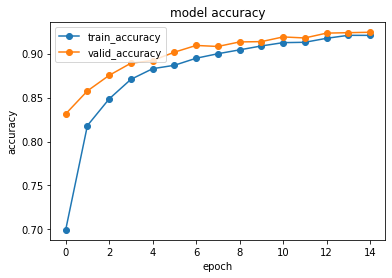

In [12]:
plt.plot(train_accuracy,'-o')
plt.plot(valid_accuracy,'-o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','valid_accuracy'],loc='upper left')

In [13]:
#output the possibility of each class
new_model.predict(x_test[0:1])

array([[3.6161196e-09, 7.0962347e-11, 5.6251193e-10, 7.3887633e-14,
        1.3337442e-12, 1.2318809e-05, 7.1663932e-11, 5.8226433e-05,
        1.3529886e-09, 9.9992943e-01]], dtype=float32)

In [14]:
#output the predicted label
p=(new_model.predict(x_test)>0.5).astype("int32")
p

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [15]:
x_test=x_test.reshape(10000,28,28)

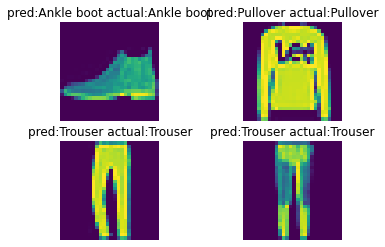

In [16]:
#label list
pred_list = []
plt.figure()
for i in range(0,4):
    plt.subplot(2,2,i+1)
    #plot
    plt.imshow(x_test[i])
    #predict
    pred = new_model.predict(x_test[0:4])
    #pred=np.argmax(pred_class,axis=1)
    pred_list=np.argmax(pred,axis=1)
    #Display actual and predicted labels of images
    plt.title("pred:"+category_dict[pred_list[i]]+" actual:"+category_dict[y_test[i]])
    plt.axis('off')
plt.show()


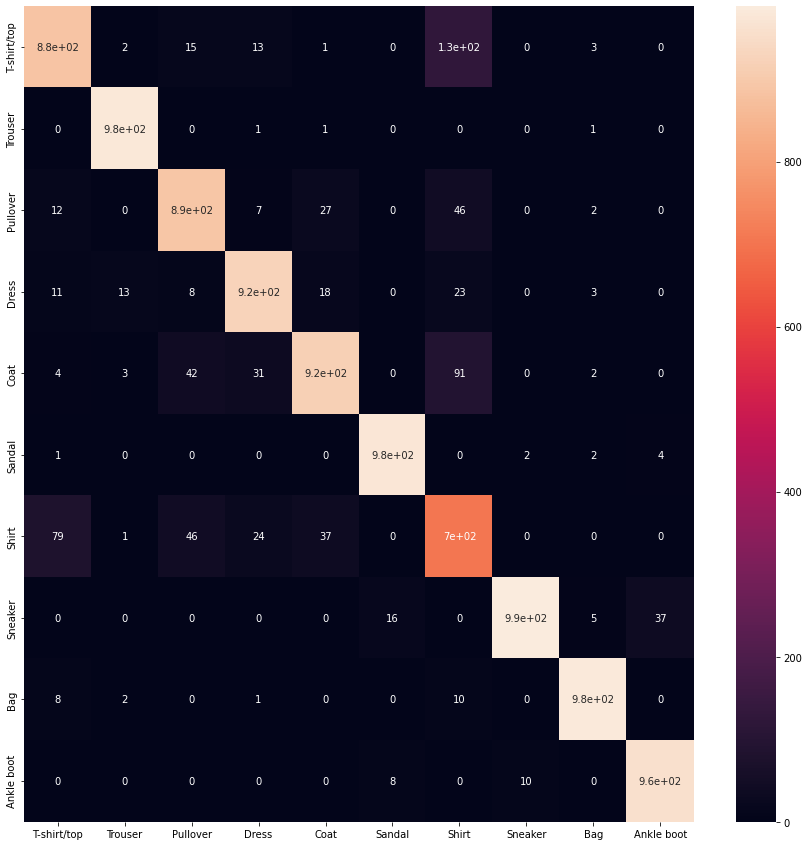

In [17]:
predictions=model.predict(x_test)
predictions_for_cm=predictions.argmax(1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
cm=confusion_matrix(predictions_for_cm,y_test)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,xticklabels=class_names,yticklabels=class_names)